# Human Activity Recognition (Hierarchy) using ML

## Setting up the Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

## Loading the data 
Since the data is separated then we need to load each on of them 

In [14]:
features=pd.read_csv('C:/Users/jwsam/Desktop/UCI HAR/UCI HAR Dataset/features.txt',
                       delim_whitespace=True, header=None, names=['index', 'feature'])

C:\Users\jwsam\AppData\Local\Temp\ipykernel_25848\3472268599.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features=pd.read_csv('C:/Users/jwsam/Desktop/UCI HAR/UCI HAR Dataset/features.txt',


In [15]:
features

,index,feature
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [17]:
feature_names=features['feature'].values

In [18]:
feature_names

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [24]:
unique_feature_names = []
seen = {}
for i, f in enumerate(feature_names):
    if f in seen:
        seen[f] += 1
        new_name = f"{f}_{seen[f]}"
    else:
        seen[f] = 0
        new_name = f
    unique_feature_names.append(new_name)

In [25]:
unique_feature_names

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [28]:
# Load train
x_train = pd.read_csv(
    'C:/Users/jwsam/Desktop/UCI HAR/UCI HAR Dataset/train/X_train.txt',
    sep="\s+",
    header=None,
    names=unique_feature_names
)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jwsam\AppData\Local\Temp\ipykernel_25848\3993602065.py:4: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


In [30]:
x_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [17]:
y_train = pd.read_csv(
    "C:/Users/jwsam/Desktop/UCI HAR/UCI HAR Dataset/train/y_train.txt",
    sep="\s+",
    header=None,
    names=["Activity"]
)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jwsam\AppData\Local\Temp\ipykernel_25476\3809041175.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


In [18]:
y_train

,Activity
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [22]:
#Load the Test data:
# Load test
x_test = pd.read_csv(
    "C:/Users/jwsam/Desktop/UCI HAR/UCI HAR Dataset/test/X_test.txt",
    sep="\s+",
    header=None,
    names=unique_feature_names
)


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jwsam\AppData\Local\Temp\ipykernel_25476\916821720.py:5: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


In [23]:
x_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [24]:
y_test = pd.read_csv(
    "C:/Users/jwsam/Desktop/UCI HAR/UCI HAR Dataset/test/y_test.txt",
    sep="\s+",
    header=None,
    names=["Activity"]
)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jwsam\AppData\Local\Temp\ipykernel_25476\3523710087.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


In [25]:
y_test

,Activity
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [27]:
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (7352, 561) (7352, 1)
Test shape: (2947, 561) (2947, 1)


In [28]:
# Select features we want
keep_mask = features["feature"].str.contains(
    "tBodyAcc|tBodyGyro"
) & features["feature"].str.contains("mean\\(\\)|std\\(\\)|Mag")

In [29]:
# Get selected feature names
selected_features = features[keep_mask]["feature"].tolist()

In [30]:
selected_features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-mean()-Y',
 'tBodyAccJerk-mean()-Z',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-std()-Y',
 'tBodyAccJerk-std()-Z',
 'tBodyGyro-mean()-X',
 'tBodyGyro-mean()-Y',
 'tBodyGyro-mean()-Z',
 'tBodyGyro-std()-X',
 'tBodyGyro-std()-Y',
 'tBodyGyro-std()-Z',
 'tBodyGyroJerk-mean()-X',
 'tBodyGyroJerk-mean()-Y',
 'tBodyGyroJerk-mean()-Z',
 'tBodyGyroJerk-std()-X',
 'tBodyGyroJerk-std()-Y',
 'tBodyGyroJerk-std()-Z',
 'tBodyAccMag-mean()',
 'tBodyAccMag-std()',
 'tBodyAccMag-mad()',
 'tBodyAccMag-max()',
 'tBodyAccMag-min()',
 'tBodyAccMag-sma()',
 'tBodyAccMag-energy()',
 'tBodyAccMag-iqr()',
 'tBodyAccMag-entropy()',
 'tBodyAccMag-arCoeff()1',
 'tBodyAccMag-arCoeff()2',
 'tBodyAccMag-arCoeff()3',
 'tBodyAccMag-arCoeff()4',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-std()',
 'tBodyAccJerkMag-mad()',
 'tBodyAccJerkMag-max()',
 'tBo

In [64]:
# Define patterns to REMOVE
remove_keywords = [
    "mad()", "iqr()", "entropy()", "energy()", "sma()", 
    "arCoeff", "correlation", "bandsEnergy","meanFreq()",   
    "skewness()", "kurtosis()",  
    "maxInds",       
    "angle("        
]

# Filter features: keep only those that DON'T contain any of the remove keywords
selected_features = [
    f for f in feature_names 
    if not any(key in f for key in remove_keywords)
]

In [65]:
print(f"Original feature count: {len(feature_names)}")
print(f"Filtered feature count: {len(selected_features)}")


Original feature count: 561
Filtered feature count: 132


In [66]:
selected_features 

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-std()-X',
 'tGravityAcc-std()-Y',
 'tGravityAcc-std()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-mean()-Y',
 'tBodyAccJerk-mean()-Z',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-std()-Y',
 'tBodyAccJerk-std()-Z',
 'tBodyAccJerk-max()-X',
 'tBodyAccJerk-max()-Y',
 'tBodyAccJerk-max()-Z',
 'tBodyAccJerk-min()-X',
 'tBodyAccJerk-min()-Y',
 'tBodyAccJerk-min()-Z',
 'tBodyGyro-mean()-X',
 'tBodyGyro-mean()-Y',
 'tBodyGyro-mean()-Z',
 'tBodyGyro-std()-X',
 'tBodyGyro-std()-Y',
 'tBodyGyro-std()-Z',
 'tBodyGyro-max(

In [67]:
x_train_selected = x_train[selected_features]

In [68]:
x_train_selected 

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min()
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.934724,-0.567378,-0.744413,0.852947,...,-0.993365,-0.988175,-0.980135,-0.961309,-0.952264,-0.989498,-0.991990,-0.990697,-0.992448,-0.991048
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.943068,-0.557851,-0.818409,0.849308,...,-0.994489,-0.989549,-0.988296,-0.983322,-0.986321,-0.991829,-0.995854,-0.996399,-0.996866,-0.994440
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.938692,-0.557851,-0.818409,0.843609,...,-0.993179,-0.999890,-0.989255,-0.986028,-0.990979,-0.995703,-0.995031,-0.995127,-0.996060,-0.995866
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.938692,-0.576159,-0.829711,0.843609,...,-0.994455,-0.995562,-0.989413,-0.987836,-0.986749,-0.996199,-0.995221,-0.995237,-0.995273,-0.995732
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.942469,-0.569174,-0.824705,0.849095,...,-0.995485,-0.982177,-0.991433,-0.989059,-0.991462,-0.998353,-0.995093,-0.995465,-0.995609,-0.997418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,0.210795,0.029369,-0.076700,0.273480,...,-0.351858,-0.937302,-0.332753,-0.129727,-0.251258,-0.995117,-0.681097,-0.723951,-0.799450,-0.925241
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,0.117440,0.029369,-0.031966,0.282174,...,-0.410824,-0.805086,-0.357992,-0.187114,-0.131733,-0.916112,-0.682756,-0.771183,-0.779350,-0.761880
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,0.043999,-0.110405,0.055411,0.263175,...,-0.316546,-0.786822,-0.351948,-0.032290,0.167388,-0.972099,-0.685851,-0.726372,-0.709270,-0.692582
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,0.101702,-0.149495,0.055411,0.234850,...,-0.423830,-0.694837,-0.415004,0.039199,0.115989,-0.959329,-0.712131,-0.689421,-0.694807,-0.886154


In [69]:
x_test_selected = x_test[selected_features]

In [70]:
x_test_selected

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min()
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.894088,-0.554577,-0.466223,0.717208,...,-0.928466,-0.898100,-0.770610,-0.797113,-0.820188,-0.937959,-0.890165,-0.907308,-0.917883,-0.909829
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.894088,-0.554577,-0.806013,0.768031,...,-0.949973,-0.967705,-0.924461,-0.916774,-0.917983,-0.991121,-0.951977,-0.938212,-0.949922,-0.986902
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.939260,-0.568512,-0.799116,0.848305,...,-0.975455,-0.976358,-0.975209,-0.973998,-0.982849,-0.997663,-0.985689,-0.983273,-0.986857,-0.989609
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.938610,-0.568512,-0.799116,0.848305,...,-0.984915,-0.995508,-0.976297,-0.971248,-0.974878,-0.996129,-0.985562,-0.985843,-0.988566,-0.992021
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.938610,-0.560831,-0.825894,0.849179,...,-0.991265,-0.988453,-0.977007,-0.969619,-0.973746,-0.996970,-0.990498,-0.990572,-0.992653,-0.992505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,0.185361,-0.160309,-0.131106,0.354922,...,-0.512636,-0.538539,-0.477844,-0.571234,-0.605614,-0.861894,-0.601424,-0.618829,-0.698564,-0.770173
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,0.185361,-0.035922,-0.131106,0.414650,...,-0.508666,-0.617444,-0.491855,-0.556577,-0.664599,-0.682096,-0.566344,-0.592507,-0.662435,-0.947627
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,0.007471,-0.035922,-0.172677,0.402517,...,-0.342640,-0.517446,-0.601283,-0.563327,-0.619462,-0.807723,-0.592331,-0.617948,-0.619598,-0.930426
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,0.007471,-0.106078,-0.172677,0.357500,...,-0.417162,-0.600729,-0.638555,-0.565917,-0.626121,-0.918150,-0.679711,-0.654960,-0.695836,-0.785712


In [71]:
# Map old activity IDs (1–6) into new activity levels (1–3)
activity_level_map = {
    1: 2,  # WALKING → Medium
    2: 3,  # WALKING_UPSTAIRS → High
    3: 3,  # WALKING_DOWNSTAIRS → High
    4: 1,  # SITTING → Slow
    5: 1,  # STANDING → Slow
    6: 1   # LAYING → Slow
}

In [72]:
# Apply mapping to train and test labels
y_train["ActivityLevel"] = y_train["Activity"].map(activity_level_map)
y_test["ActivityLevel"] = y_test["Activity"].map(activity_level_map)

In [73]:
print(y_train.head())

   Activity  ActivityLevel
0         5              1
1         5              1
2         5              1
3         5              1
4         5              1


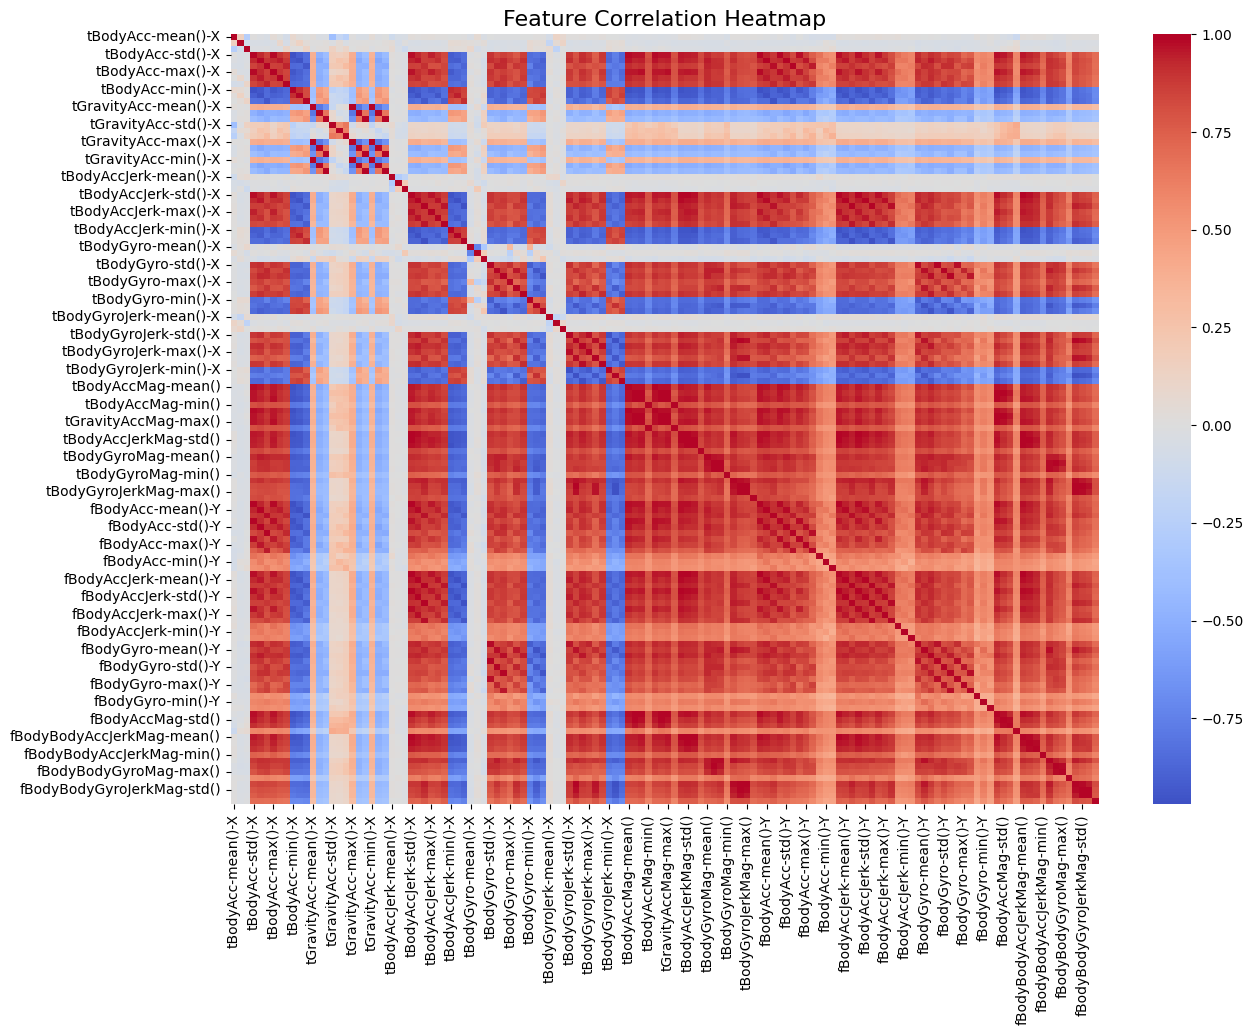

In [74]:
plt.figure(figsize=(14,10))
corr=x_train_selected.corr()
sns.heatmap(corr,cmap='coolwarm',center=0)
plt.title('Feature Correlation Heatmap',fontsize=16)
plt.show()

In [75]:
# Copy the dataset
x_train_combined = x_train_selected.copy()
x_test_combined = x_test_selected.copy()

# --- Automatically detect all 3-axis groups ---
axis_suffixes = ['-X', '-Y', '-Z']
processed_groups = set()

for col in x_train_selected.columns:
    # Only process if column ends with -X
    if col.endswith('-X'):
        base_name = col[:-2]  # remove -X to get base
        # Check if -Y and -Z exist
        y_col = base_name + '-Y'
        z_col = base_name + '-Z'
        if y_col in x_train_selected.columns and z_col in x_train_selected.columns:
            # Avoid duplicate processing
            if base_name not in processed_groups:
                # Compute magnitude
                mag_name = base_name + '-mag'
                x_train_combined[mag_name] = np.sqrt(
                    x_train_selected[col]**2 +
                    x_train_selected[y_col]**2 +
                    x_train_selected[z_col]**2
                )
                x_test_combined[mag_name] = np.sqrt(
                    x_test_selected[col]**2 +
                    x_test_selected[y_col]**2 +
                    x_test_selected[z_col]**2
                )
                # Drop original X/Y/Z columns
                x_train_combined.drop(columns=[col, y_col, z_col], inplace=True)
                x_test_combined.drop(columns=[col, y_col, z_col], inplace=True)
                processed_groups.add(base_name)

print("Number of features after combining 3-axis into magnitude:", x_train_combined.shape[1])
print("Sample features:", x_train_combined.columns[:10])


Number of features after combining 3-axis into magnitude: 68
Sample features: Index(['tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-max()',
       'tBodyAccMag-min()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-max()', 'tGravityAccMag-min()',
       'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()'],
      dtype='object')


In [78]:
x_test_combined

,tBodyAccMag-mean(),tBodyAccMag-std(),tBodyAccMag-max(),tBodyAccMag-min(),tGravityAccMag-mean(),tGravityAccMag-std(),tGravityAccMag-max(),tGravityAccMag-min(),tBodyAccJerkMag-mean(),tBodyAccJerkMag-std(),...,fBodyAcc-max()-mag,fBodyAcc-min()-mag,fBodyAccJerk-mean()-mag,fBodyAccJerk-std()-mag,fBodyAccJerk-max()-mag,fBodyAccJerk-min()-mag,fBodyGyro-mean()-mag,fBodyGyro-std()-mag,fBodyGyro-max()-mag,fBodyGyro-min()-mag
0,-0.866929,-0.705191,-0.760796,-0.981649,-0.866929,-0.705191,-0.760796,-0.981649,-0.929767,-0.895994,...,1.475919,1.676017,1.594103,1.625642,1.654577,1.680201,1.474293,1.551429,1.590084,1.586533
1,-0.968961,-0.953902,-0.937608,-0.985944,-0.968961,-0.953902,-0.937608,-0.985944,-0.973717,-0.941008,...,1.680520,1.707678,1.666465,1.687344,1.702438,1.691164,1.626927,1.633782,1.634740,1.689024
2,-0.976228,-0.979083,-0.969212,-0.985944,-0.976228,-0.979083,-0.969212,-0.985944,-0.981618,-0.971371,...,1.697102,1.712193,1.695227,1.694731,1.697513,1.725460,1.689190,1.691346,1.699404,1.723342
3,-0.974325,-0.977016,-0.969212,-0.986263,-0.974325,-0.977016,-0.969212,-0.986263,-0.982712,-0.974807,...,1.707264,1.716597,1.693629,1.702079,1.704242,1.700435,1.685637,1.676846,1.673751,1.723301
4,-0.975836,-0.976893,-0.975954,-0.993228,-0.975836,-0.976893,-0.975954,-0.993228,-0.986908,-0.988854,...,1.701100,1.712167,1.705980,1.709435,1.709739,1.713458,1.689111,1.686435,1.695183,1.721721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,-0.200885,-0.234388,-0.053767,-0.726890,-0.200885,-0.234388,-0.053767,-0.726890,-0.455923,-0.412671,...,0.579477,1.433178,0.864882,0.899245,1.050076,1.502921,0.785292,0.849815,0.940077,1.376694
2943,-0.170563,-0.198627,-0.053767,-0.726890,-0.170563,-0.198627,-0.053767,-0.726890,-0.425750,-0.288065,...,0.717943,1.298375,0.717796,0.855278,1.056331,1.253958,0.732384,0.738695,0.897316,1.401062
2944,-0.207603,-0.252388,-0.117645,-0.681888,-0.207603,-0.252388,-0.117645,-0.681888,-0.463232,-0.292370,...,0.584496,1.325826,0.734218,0.922248,0.998689,1.229702,0.668605,0.784343,0.894362,1.127904
2945,-0.233866,-0.292705,-0.204541,-0.716092,-0.233866,-0.292705,-0.204541,-0.716092,-0.486495,-0.362104,...,0.602119,1.523639,0.845780,0.957788,1.050037,1.353107,0.908322,0.969700,1.095207,1.523616


In [79]:
# Print features of the combined dataset as a list
feature_list = list(x_train_combined.columns)
print(feature_list)


['tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-max()', 'tBodyAccMag-min()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-min()', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroMag-max()', 'tBodyGyroMag-min()', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()', 'tBodyGyroJerkMag-max()', 'tBodyGyroJerkMag-min()', 'fBodyAccMag-mean()', 'fBodyAccMag-std()', 'fBodyAccMag-max()', 'fBodyAccMag-min()', 'fBodyBodyAccJerkMag-mean()', 'fBodyBodyAccJerkMag-std()', 'fBodyBodyAccJerkMag-max()', 'fBodyBodyAccJerkMag-min()', 'fBodyBodyGyroMag-mean()', 'fBodyBodyGyroMag-std()', 'fBodyBodyGyroMag-max()', 'fBodyBodyGyroMag-min()', 'fBodyBodyGyroJerkMag-mean()', 'fBodyBodyGyroJerkMag-std()', 'fBodyBodyGyroJerkMag-max()', 'fBodyBodyGyroJerkMag-min()', 'tBodyAcc-mean()-mag', 'tBodyAcc-std()-mag', 'tBodyAcc-max()-mag', 'tBodyAcc-min()-mag', 'tGra

In [80]:
# Remove columns containing 'Gyro'
cols_to_keep = [f for f in x_train_combined.columns if 'Gyro' not in f]
x_train_final = x_train_combined[cols_to_keep]
x_test_final = x_test_combined[cols_to_keep]

print("Number of features after removing gyroscope data:", x_train_final.shape[1])


Number of features after removing gyroscope data: 40


In [81]:
feature_list = list(x_train_final.columns)
print(feature_list)

['tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-max()', 'tBodyAccMag-min()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-min()', 'fBodyAccMag-mean()', 'fBodyAccMag-std()', 'fBodyAccMag-max()', 'fBodyAccMag-min()', 'fBodyBodyAccJerkMag-mean()', 'fBodyBodyAccJerkMag-std()', 'fBodyBodyAccJerkMag-max()', 'fBodyBodyAccJerkMag-min()', 'tBodyAcc-mean()-mag', 'tBodyAcc-std()-mag', 'tBodyAcc-max()-mag', 'tBodyAcc-min()-mag', 'tGravityAcc-mean()-mag', 'tGravityAcc-std()-mag', 'tGravityAcc-max()-mag', 'tGravityAcc-min()-mag', 'tBodyAccJerk-mean()-mag', 'tBodyAccJerk-std()-mag', 'tBodyAccJerk-max()-mag', 'tBodyAccJerk-min()-mag', 'fBodyAcc-mean()-mag', 'fBodyAcc-std()-mag', 'fBodyAcc-max()-mag', 'fBodyAcc-min()-mag', 'fBodyAccJerk-mean()-mag', 'fBodyAccJerk-std()-mag', 'fBodyAccJerk-max()-mag', 'fBodyAccJerk-min()-mag']


# Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_final)
X_test_scaled = scaler.transform(x_test_final)

In [84]:
print("Scaled training shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

Scaled training shape: (7352, 40)
Scaled test shape: (2947, 40)


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [92]:
y_train_level = y_train['ActivityLevel']
y_test_level = y_test['ActivityLevel']
print(y_train_level.shape) 
print(y_test_level.shape)   

(7352,)
(2947,)


In [93]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=3,scoring='f1_weighted',verbose=1)
grid_search.fit(X_train_scaled, y_train_level)

print("Best hyperparameters:", grid_search.best_params_)
print('Train F1-weighted (CV):', grid_search.best_score_)
preds = grid_search.predict(X_test_scaled)
print('Test Accuracy:', accuracy_score(y_test_level, preds))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train F1-weighted (CV): 0.9707878591001252
Test Accuracy: 0.9745503902273498


In [90]:
print(X_train_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(7352, 40)
(7352, 2)
(2947, 2)


In [91]:
print(y_train)

      Activity  ActivityLevel
0            5              1
1            5              1
2            5              1
3            5              1
4            5              1
...        ...            ...
7347         2              3
7348         2              3
7349         2              3
7350         2              3
7351         2              3

[7352 rows x 2 columns]


In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
ab = AdaBoostClassifier(random_state=42)
params_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5]
}
grid_ab = GridSearchCV(
    estimator=ab,
    param_grid=params_ab,
    cv=3,
    scoring='f1_weighted',
    verbose=1
)
grid_search.fit(X_train_scaled,y_train_level)
print("Best hyperparameters:", grid_search.best_params_)
print("Train F1-weighted (CV):", grid_search.best_score_)

preds = grid_search.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test['ActivityLevel'], preds))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train F1-weighted (CV): 0.9707878591001252
Test Accuracy: 0.9745503902273498


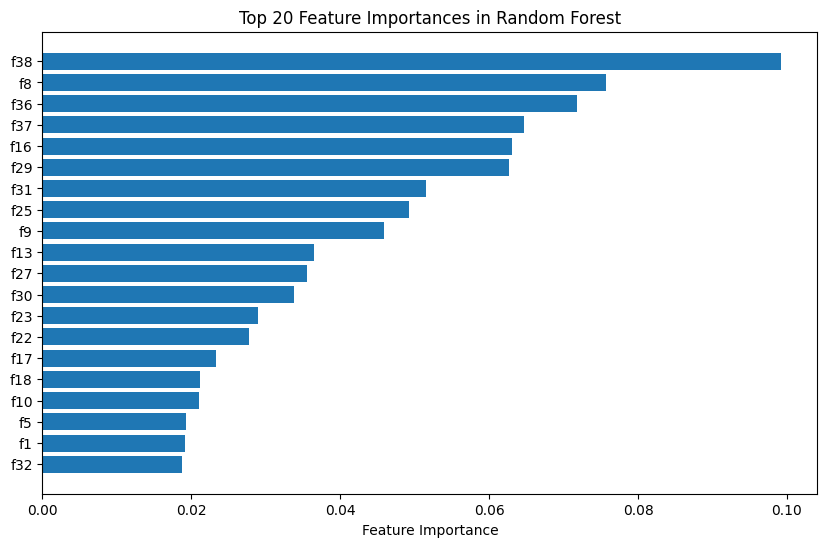

In [97]:
best_rf = grid_search.best_estimator_

# Get feature importance
importances = best_rf.feature_importances_
feature_names = X_train_scaled.columns if hasattr(X_train_scaled, "columns") else [f"f{i}" for i in range(X_train_scaled.shape[1])]

# Create a DataFrame for easier plotting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 20 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df["Feature"].head(20)[::-1], feat_imp_df["Importance"].head(20)[::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances in Random Forest")
plt.show()


In [98]:
feature_list

['tBodyAccMag-mean()',
 'tBodyAccMag-std()',
 'tBodyAccMag-max()',
 'tBodyAccMag-min()',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-std()',
 'tBodyAccJerkMag-max()',
 'tBodyAccJerkMag-min()',
 'fBodyAccMag-mean()',
 'fBodyAccMag-std()',
 'fBodyAccMag-max()',
 'fBodyAccMag-min()',
 'fBodyBodyAccJerkMag-mean()',
 'fBodyBodyAccJerkMag-std()',
 'fBodyBodyAccJerkMag-max()',
 'fBodyBodyAccJerkMag-min()',
 'tBodyAcc-mean()-mag',
 'tBodyAcc-std()-mag',
 'tBodyAcc-max()-mag',
 'tBodyAcc-min()-mag',
 'tGravityAcc-mean()-mag',
 'tGravityAcc-std()-mag',
 'tGravityAcc-max()-mag',
 'tGravityAcc-min()-mag',
 'tBodyAccJerk-mean()-mag',
 'tBodyAccJerk-std()-mag',
 'tBodyAccJerk-max()-mag',
 'tBodyAccJerk-min()-mag',
 'fBodyAcc-mean()-mag',
 'fBodyAcc-std()-mag',
 'fBodyAcc-max()-mag',
 'fBodyAcc-min()-mag',
 'fBodyAccJerk-mean()-mag',
 'fBodyAccJerk-std()-mag',
 'fBodyAccJerk-max()-mag',
 'fBodyAccJer

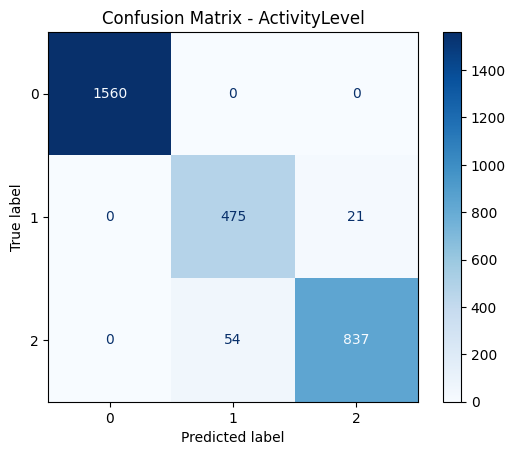

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = best_rf.predict(X_test_scaled)

# Extract ActivityLevel (assuming it's the second column)
y_test_level = y_test['ActivityLevel']
y_pred_level = y_pred
# Confusion matrix
cm = confusion_matrix(y_test_level, y_pred_level)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ActivityLevel")
plt.show()


In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test_level, y_pred_level))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1560
           2       0.90      0.96      0.93       496
           3       0.98      0.94      0.96       891

    accuracy                           0.97      2947
   macro avg       0.96      0.97      0.96      2947
weighted avg       0.98      0.97      0.97      2947

